

Starting Portfolio Equity: 6000000.0
Final Portfolio Equity: 20660490.6203
Total return: 244.34% 
Daily return: 0.05% 
Risk: 0.32% 
Sharpe: 2.50 
Sortino: 5.21 
CAGR: 13.64% 
Max drawdown: -4.62% 


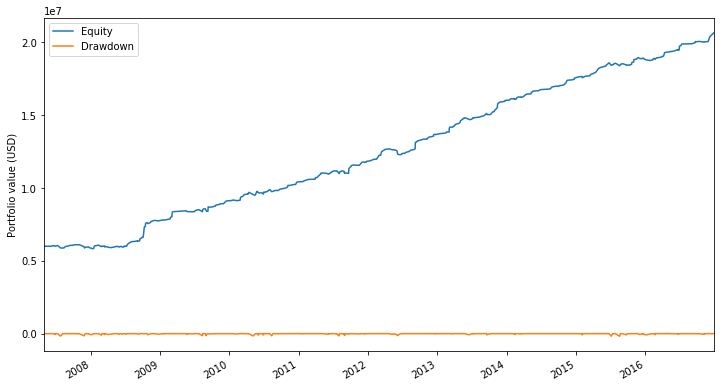

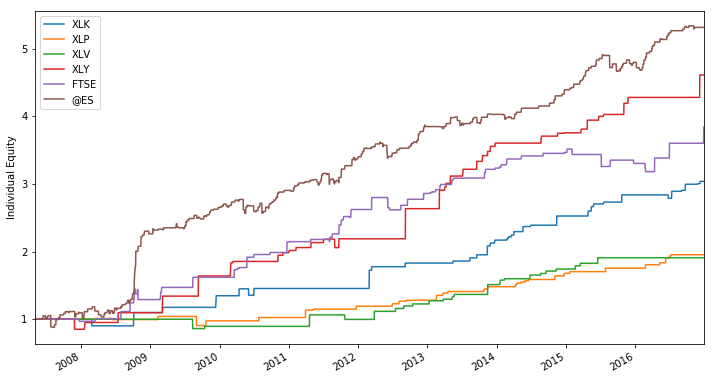

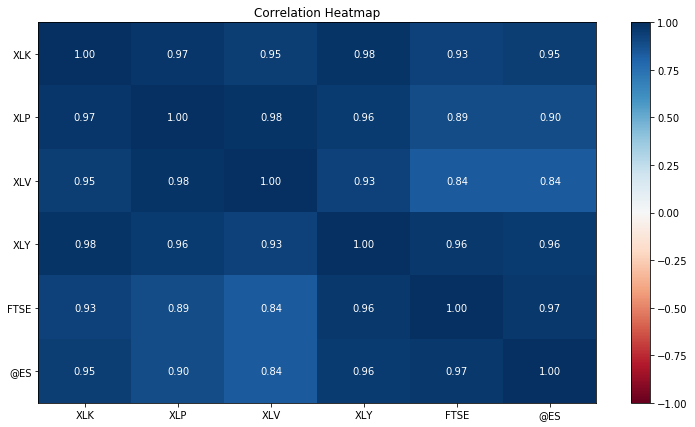



Stats for Total from 2007-05-01 00:00:00 - 2016-12-30 00:00:00
Annual risk-free rate considered: 0.25%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
244.34%              2.5  13.64%  -4.62%

Annualized Returns:
mtd    3m     6m     ytd    1y     3y     5y      10y     incep.
-----  -----  -----  -----  -----  -----  ------  ------  --------
3.01%  3.07%  4.65%  9.45%  9.45%  8.84%  11.81%  13.64%  13.64%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  2.50     2.00       2.14
mean    12.93%   13.17%     15.09%
vol     5.08%    6.46%      6.93%
skew    4.41     3.25       1.54
kurt    55.04    22.05      3.25
best    4.05%    14.35%     30.88%
worst   -2.78%   -3.53%     7.54%

Drawdowns:
max       max # days  avg       avg # days
------  ------------  ------  ------------
-4.62%           230  -0.70%         28.63

Misc:
---------------  -------
avg. up month    1.54%
avg. down month

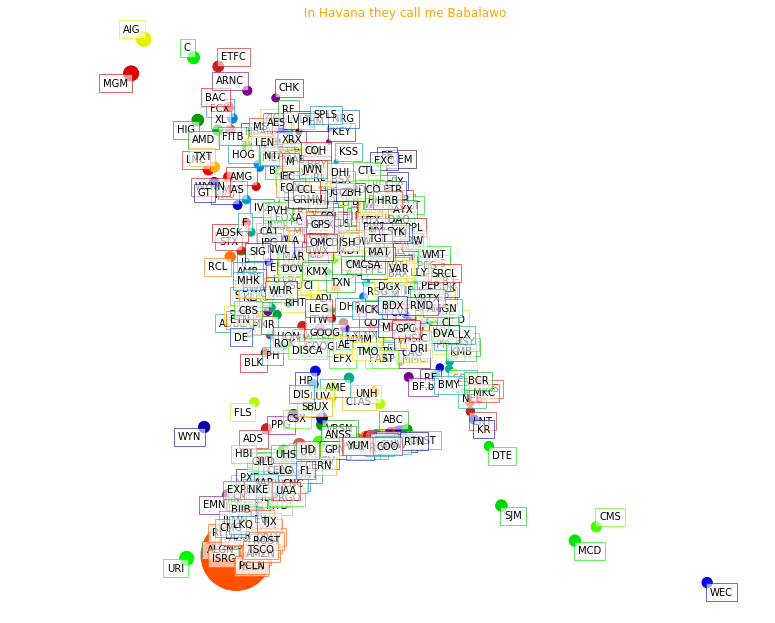

Look like profiling the SP500 yielded a distinct alpha cluster!
Let's isolate it.
Out of 501 symbols from SP500 

61 symbols selected via AlphaLoop.
Backtest finished in 82.13873815536499 seconds.



Starting Portfolio Equity: 61000000.0
Final Portfolio Equity: 203181496.982
Total return: 233.08% 
Daily return: 0.05% 
Risk: 0.17% 
Sharpe: 4.64 
Sortino: 7.97 
CAGR: 13.25% 
Max drawdown: -2.46% 


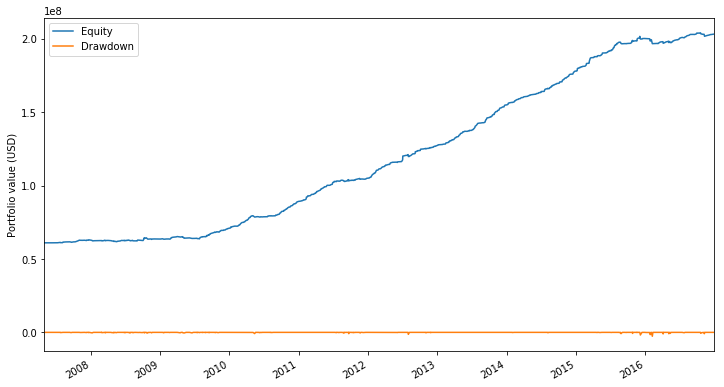

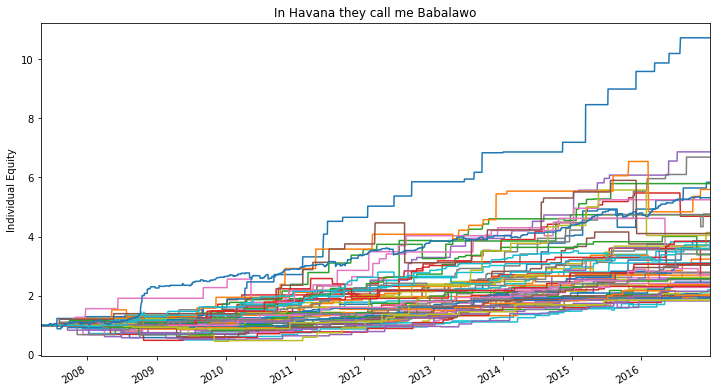



Stats for Total from 2007-05-01 00:00:00 - 2016-12-30 00:00:00
Annual risk-free rate considered: 0.25%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
233.08%             4.64  13.25%  -2.46%

Annualized Returns:
mtd    3m      6m     ytd    1y     3y     5y      10y     incep.
-----  ------  -----  -----  -----  -----  ------  ------  --------
0.47%  -0.33%  1.43%  1.49%  1.49%  9.48%  14.11%  13.25%  13.25%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  4.64     3.20       1.60
mean    12.49%   12.70%     14.19%
vol     2.64%    3.89%      8.69%
skew    1.67     0.57       -0.49
kurt    23.15    -0.03      -0.74
best    2.21%    4.07%      25.86%
worst   -1.34%   -1.10%     0.94%

Drawdowns:
max       max # days  avg       avg # days
------  ------------  ------  ------------
-2.46%           272  -0.33%         23.43

Misc:
---------------  -------
avg. up month    1.34%
avg. down 

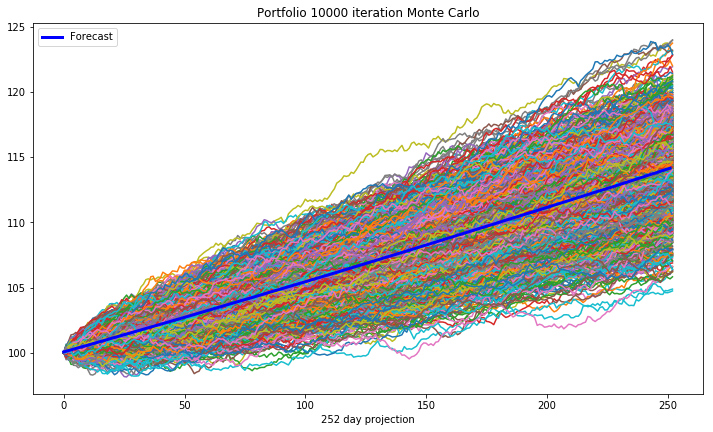

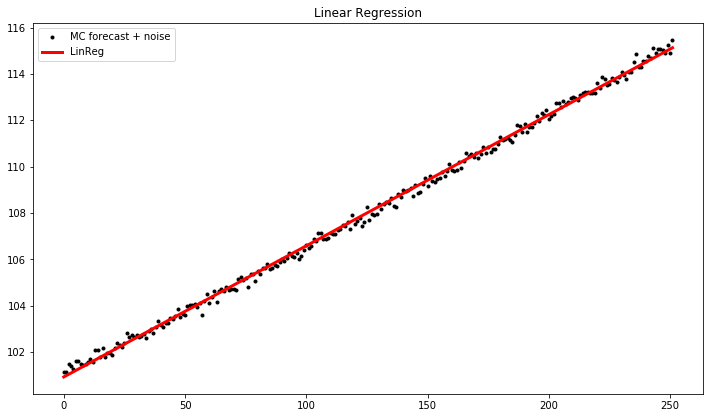

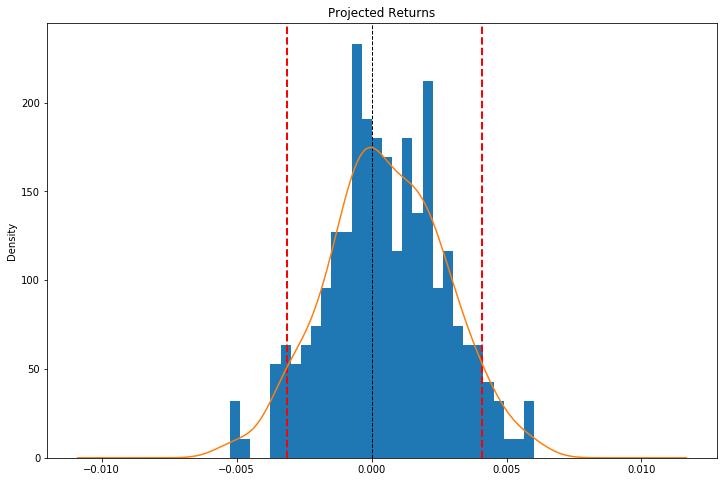

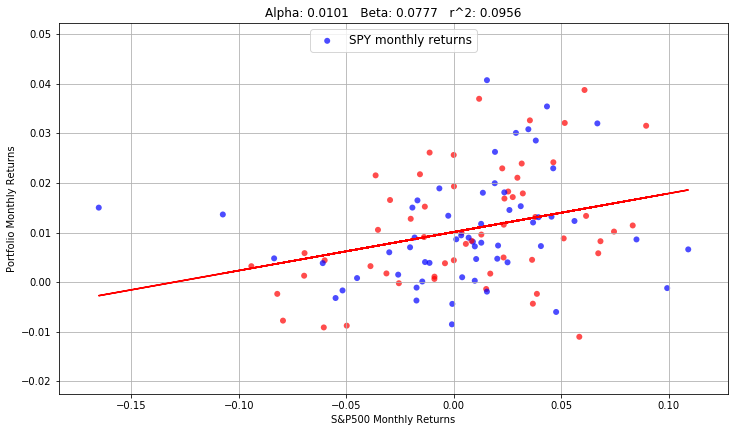

                            OLS Regression Results                            
Dep. Variable:              Portfolio   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     11.95
Date:                Mon, 18 Sep 2017   Prob (F-statistic):           0.000773
Time:                        01:08:12   Log-Likelihood:                 359.41
No. Observations:                 115   AIC:                            -714.8
Df Residuals:                     113   BIC:                            -709.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0101      0.001     10.017      0.0

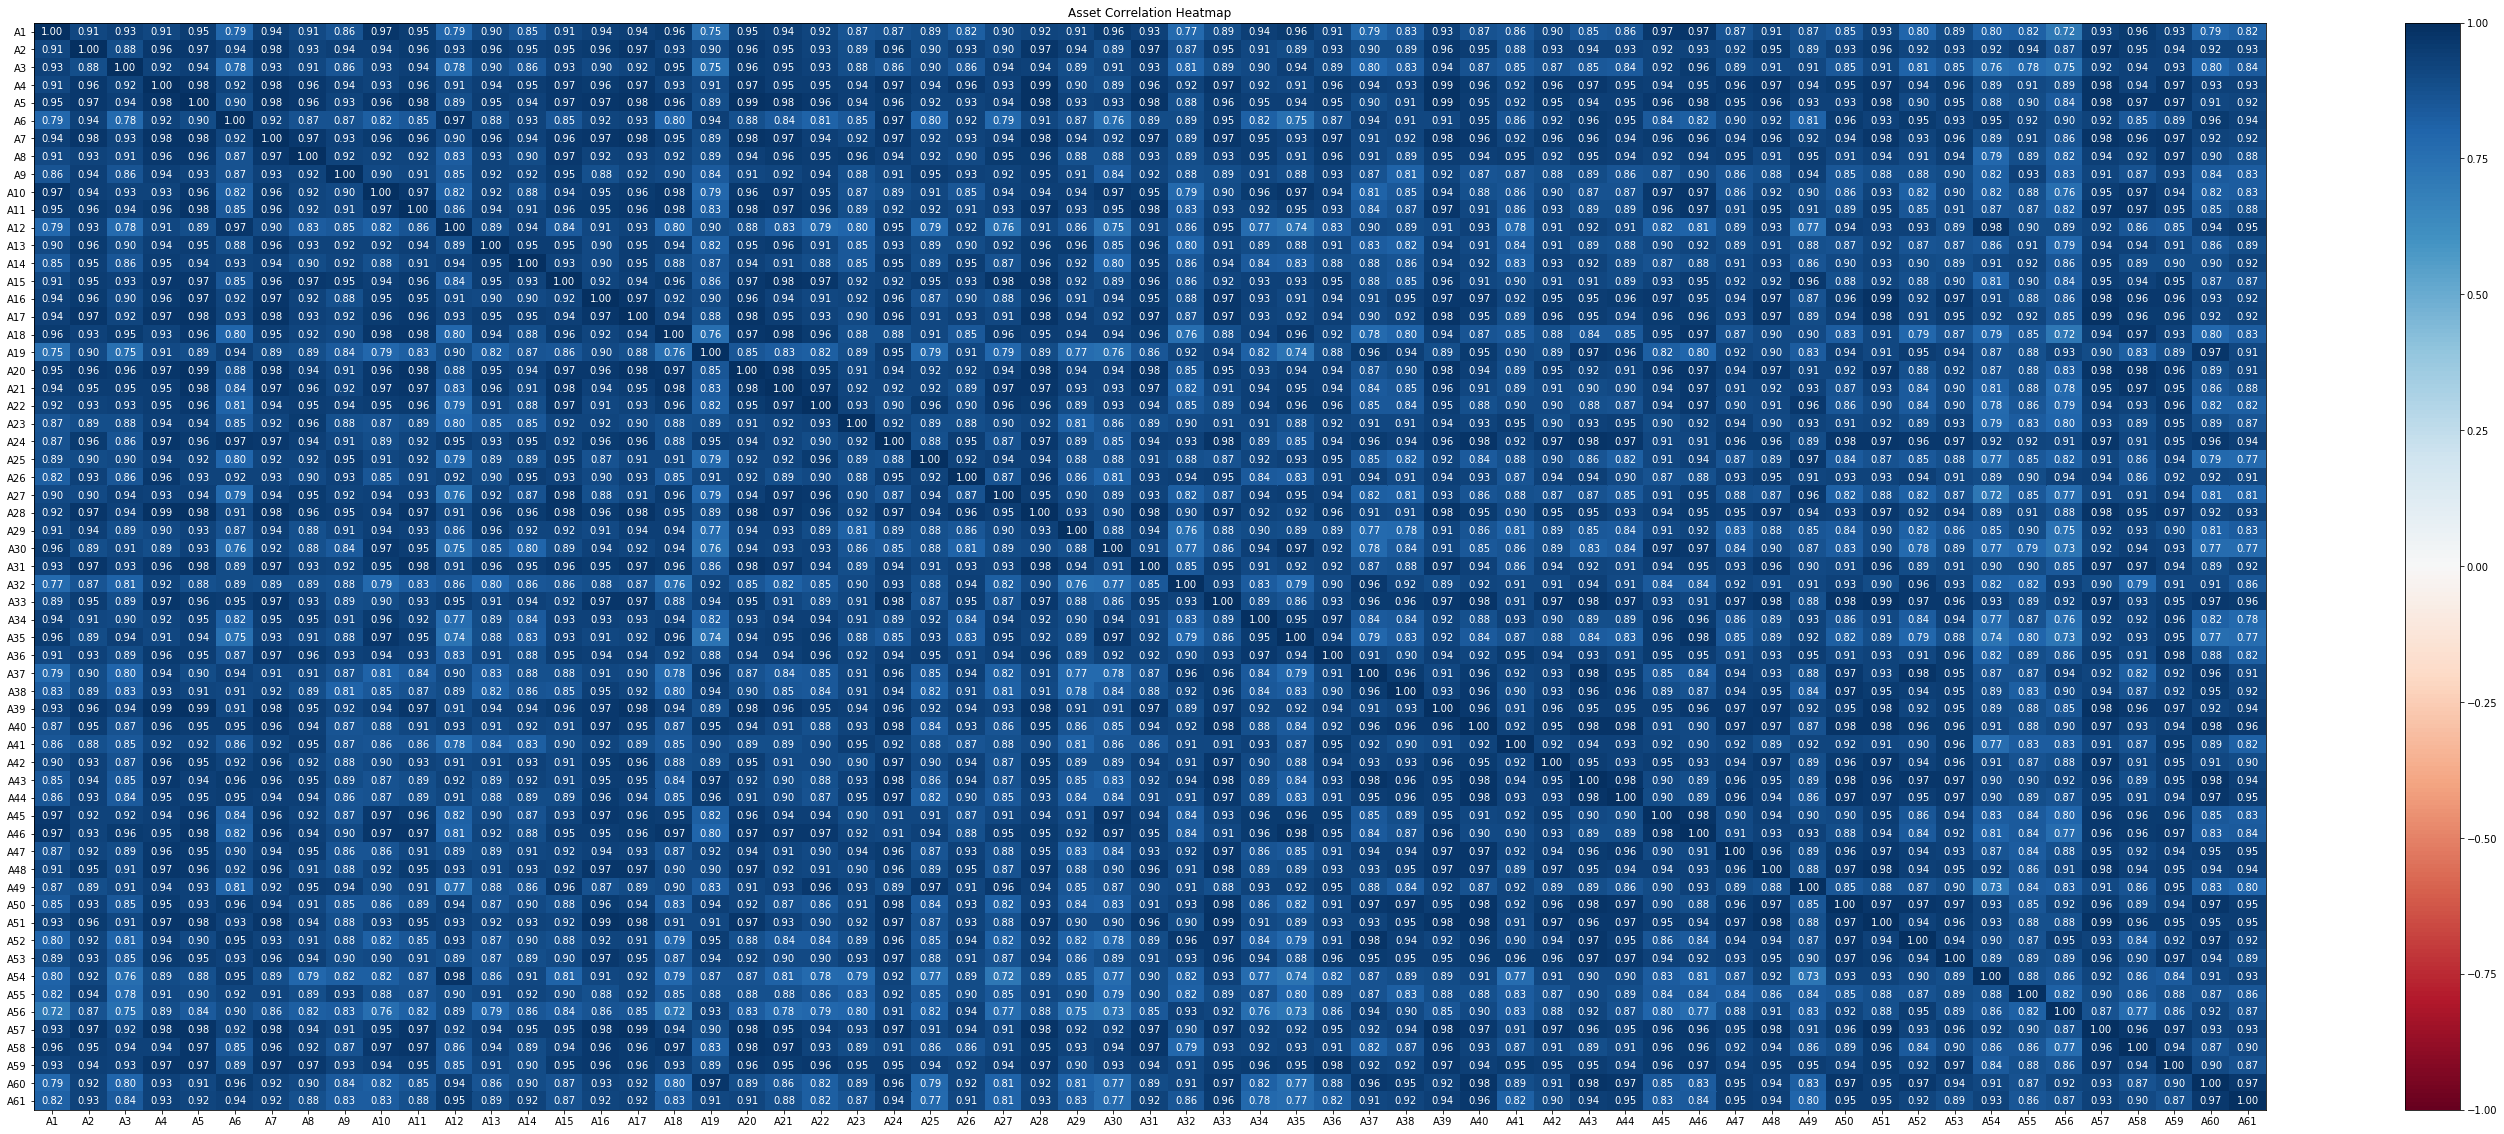

In [1]:
"""
Created on Sun Sep 17 21:38:48 2017
@author: github.com/Quantmatic
#Holla https://www.youtube.com/watch?v=paGr-0hGObo
"""
import time
import datetime
import numpy as np
import pandas as pd
import amipy
import sectors
import quant_iq as iq
from quant_iq import Humping
from AlphaLoopOne import AlphaMap
from AlphaLoop import alpha_selector
from sklearn.linear_model import LinearRegression
from forecast import MonteCarlo, RegOLS


START_DATE = datetime.datetime(2007, 5, 1)
END_DATE = datetime.datetime(2016, 12, 31)

SPDRS = ['XLK', 'XLP', 'XLV', 'XLY']
FUTURES = ['FTSE', 'ES']

OBJ = iq.ContextAlpha()
IvankaHumpalot = Humping(OBJ)  # Shabba!
portfolio = IvankaHumpalot.Spanking(SPDRS + FUTURES)  # Jigga what? Jigga Who?


portfolio = portfolio.fillna(method='ffill').fillna(method='bfill')
ret = amipy.analyze_portfolio(portfolio, 0.0025)
pone = portfolio/portfolio.iloc[0]
amipy._plot(pone, ylabel='Individual Equity', legend=True)
pl = pone.plot_corr_heatmap(title='Correlation Heatmap', figsize=(12.5,7))


amipy.analyze_portfolio_ffn(portfolio, 0.0025)
ret = amipy.analyze_portfolio(portfolio, 0.0025, False)
SPY = iq.mongo_grab('SPY', 'YAHOO', START_DATE, END_DATE)
portfolio1 = pd.DataFrame(index=SPY.index)
for symbol in SPDRS:
    ohlc = iq.mongo_grab(symbol, 'YAHOO', START_DATE, END_DATE)
    portfolio1 = portfolio1.join(ohlc)
print('\n vs alpha sector [XLK, XLP, XLV, XLY] buy and hold.')
ret = amipy.analyze_portfolio(portfolio1, 0.0025, False)
print('\n vs SPY buy and hold.')
ret = amipy.analyze_portfolio(SPY, 0.0025, False)



print('\n')
print('##########################################')
print('##########################################')
print('\n Lets see how we perform out of sample \n')
print('##########################################')
print('##########################################')
print('\n')


print("Let's use machine learning to cluster the stock market to select appropriate equities for our test.")


themap = AlphaMap()


print('Look like profiling the SP500 yielded a distinct alpha cluster!')
print("Let's isolate it.")


symbols = sectors.symbols()
print('Out of', sum([len(x[1]) for x in symbols.items()]), 'symbols from SP500 \n')
stocks = alpha_selector(symbols)
print(str(len(stocks)) + ' symbols selected via AlphaLoop.')


OBJ = iq.ContextAlpha()
OBJ.dbase = 'LCAP500'
IvankaHumpalot = Humping(OBJ)  # Shabba!


ptimer = time.time()
portfolio = IvankaHumpalot.Spanking(stocks)  # Ohh baby! Behaaaave!
print('Backtest finished in ' + str(time.time()-ptimer) + ' seconds.\n')


ret = amipy.analyze_portfolio(portfolio, 0.0025)
portfolio = portfolio.fillna(method='ffill').fillna(method='bfill')
amipy._plot(portfolio/portfolio.iloc[0], ylabel='Individual Equity', legend=False, title='In Havana they call me Babalawo')
amipy.analyze_portfolio_ffn(portfolio, 0.0025)
ret = amipy.analyze_portfolio(portfolio, 0.0025, False)
print('\n vs alpha sector [XLK, XLP, XLV, XLY] buy and hold.')
ret = amipy.analyze_portfolio(portfolio1, 0.0025, False)
print('\n vs SPY buy and hold:')
ret = amipy.analyze_portfolio(SPY, 0.0025, False)
print('\n')


portfolio['Total'] = portfolio.sum(axis=1)
series = portfolio['Total']
series.name = 'Portfolio'


steps = 10000
MMC = MonteCarlo(steps, plot=True)
stats = MMC.Run(series)


df = portfolio[:][['Total']].join(SPY)
df.columns = ['Portfolio', 'SPY']
dfm = df.resample('M').last()
returns = dfm.pct_change().dropna()


OLS = RegOLS()
OLS.regress(returns)
print(OLS.model.summary(), '\n')


print("Let's verify that! \n")
lr = LinearRegression()
_df = np.asarray(returns)
X, y = _df[:, 1:], _df[:, 0]
lr.fit(X, y)
print('Portfolio stats - Beta: %.4f  Alpha: %.4f \n' % (lr.coef_, lr.intercept_))


del portfolio['Total']
ptwo = portfolio/portfolio.iloc[0]
ptwo.columns = ['A'+str(x) for x in range(1, len(ptwo.columns)+1)]
heat = ptwo.plot_corr_heatmap(title='Asset Correlation Heatmap', figsize=(50,20))


In [2]:
#### Oh man! Did Ivanka just hump 61 symbol in 82 seconds! I must be hallucinating! On a lenovo flex 4 )))
#### http://www.youtube.com/watch?v=1F4W0R1Zr_8
#### Big thanks to Tucker Balch for schooling a Russian to the game! I loved the Monty Python dance!